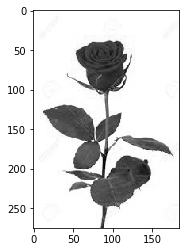

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#greyscale
image = Image.open('r1.jpg').convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

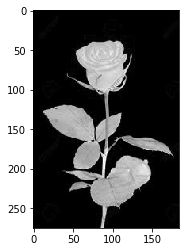

In [3]:
#inverse greyscale
plt.imshow(arr, cmap='gray_r', vmin=0, vmax=255)
plt.show()

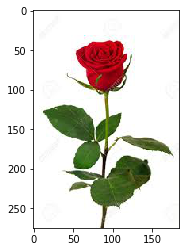

In [7]:
#display image
image1 = Image.open('r1.jpg')
plt.imshow(image)
plt.show()

In [0]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [13]:
viridis = cm.get_cmap('viridis', 12)
print(viridis)

In [17]:
import matplotlib
image1 = Image.open('r1.jpg')
matplotlib.pyplot.hot()
plt.show()

<Figure size 432x288 with 0 Axes>

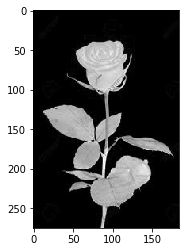

In [21]:
plt.imshow(arr, cmap='gray_r', vmin=0, vmax=255)
plt.show()

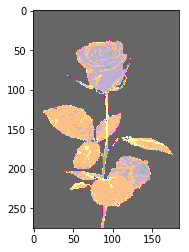

In [23]:
plt.imshow(arr, cmap='Accent', vmin=0, vmax=255)
plt.show()

ValueError: ignored

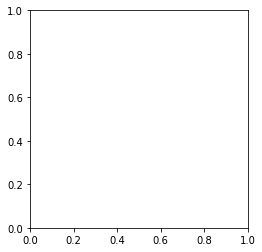

In [24]:
plt.imshow(arr, cmap='A', vmin=0, vmax=255)
plt.show()

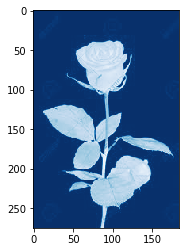

In [25]:
plt.imshow(arr, cmap='Blues', vmin=0, vmax=255)
plt.show()

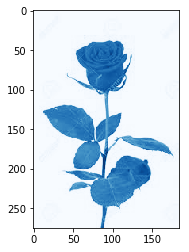

In [26]:
plt.imshow(arr, cmap='Blues_r', vmin=0, vmax=255)
plt.show()

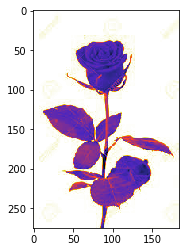

In [27]:
plt.imshow(arr, cmap='CMRmap', vmin=0, vmax=255)
plt.show()

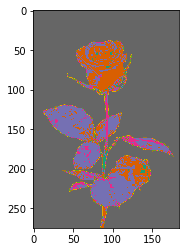

In [28]:
plt.imshow(arr, cmap='Dark2')
plt.show()

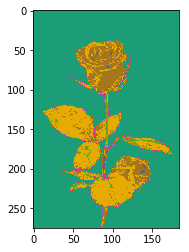

In [29]:
plt.imshow(arr, cmap='Dark2_r')
plt.show()

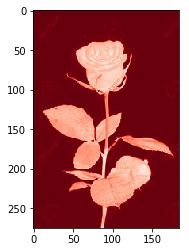

In [30]:
plt.imshow(arr, cmap='Reds')
plt.show()

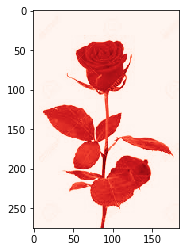

In [31]:
plt.imshow(arr, cmap='Reds_r')
plt.show()

In [0]:
#median filter for noise
#gaussian noise--> gaussian blur


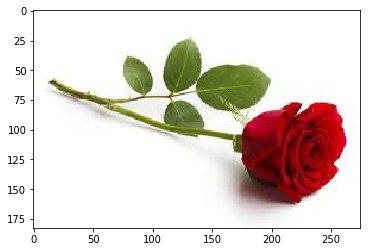

In [33]:
image1 = Image.open('r2.jpg')
plt.imshow(image1)
plt.show()

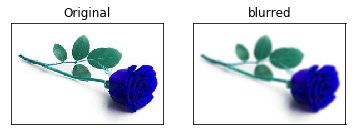

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('r2.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('blurred')
plt.xticks([]), plt.yticks([])
plt.show()

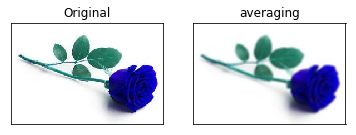

In [37]:
#averaging

img = cv2.imread('r2.jpg')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('averaging')
plt.xticks([]), plt.yticks([])
plt.show()

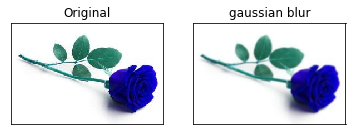

In [43]:
#gaussian filtering

img = cv2.imread('r2.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('gaussian blur')
plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


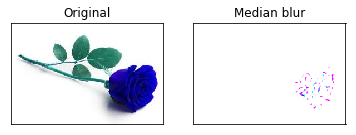

In [57]:

img = cv2.imread('r2.jpg')

median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Median blur')
plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
#to add noise
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

In [0]:
noisy("gauss",img)
plt.show(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


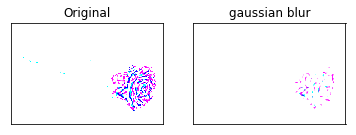

In [53]:
img = noisy("gauss",img)

blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('gaussian blur')
plt.xticks([]), plt.yticks([])
plt.show()

In [56]:
img2 = cv2.imread('r2.jpg')
img2 = noisy("s&p",img2)


median = cv2.medianBlur(img,5)


plt.subplot(121),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('median blur')
plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


error: ignored

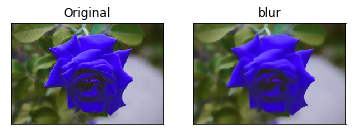

In [59]:
img = cv2.imread('r3.jpg')

blur = cv2.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('blur')
plt.xticks([]), plt.yticks([])
plt.show()


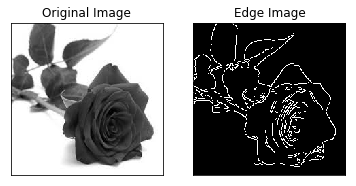

In [62]:
#edges only
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('r4.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

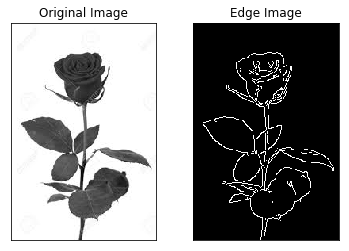

In [63]:

img = cv.imread('r1.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()